In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Cancer.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [7]:
df["diagnosis"].unique() #Benign (B): Non-cancerous,Malignant (M): Cancerous

array(['M', 'B'], dtype=object)

In [9]:
df.drop("id",inplace=True,axis=1)

In [10]:
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [15]:
df.drop("Unnamed: 32",inplace=True,axis=1)

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [20]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["diagnosis"]=le.fit_transform(df["diagnosis"])
df.head()  #noew 1 is m and 0 is b

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


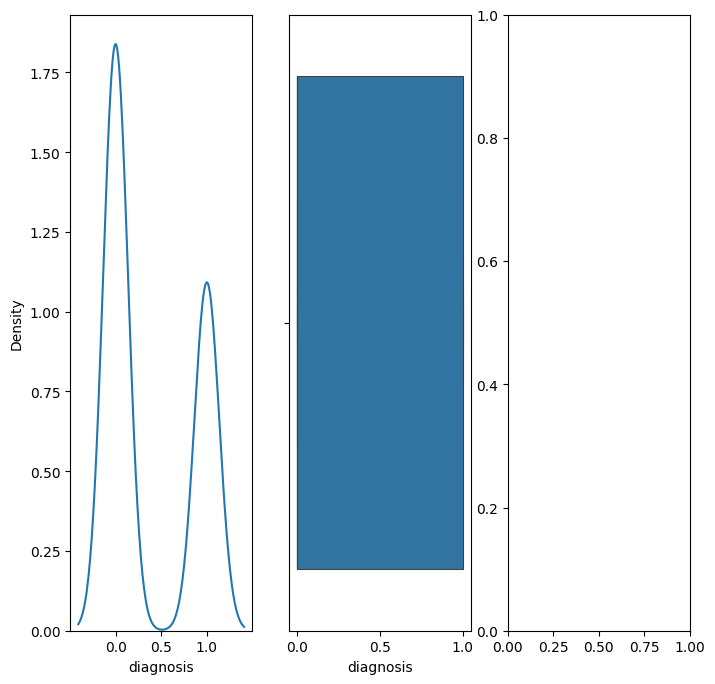

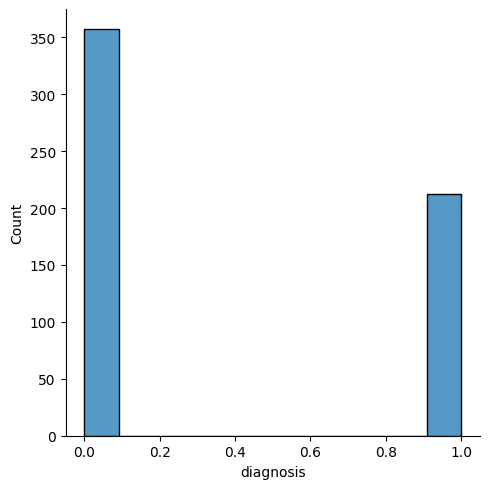

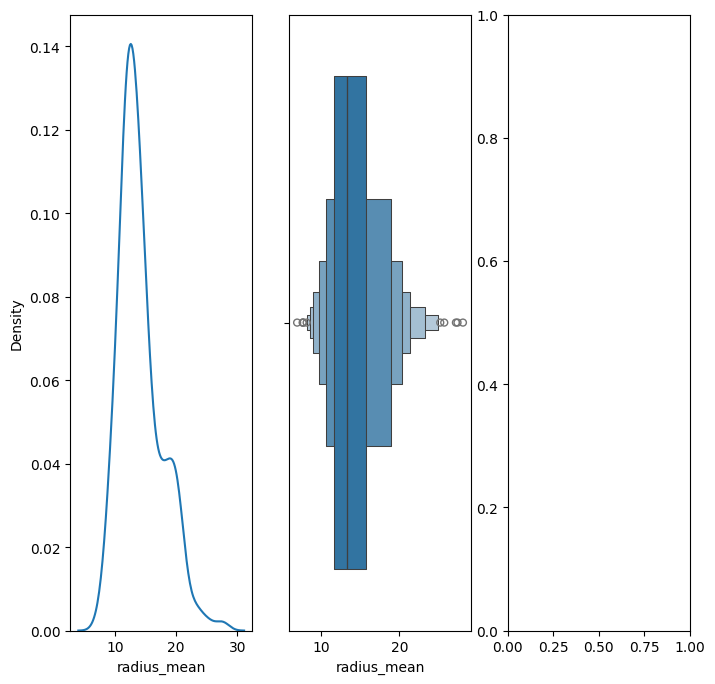

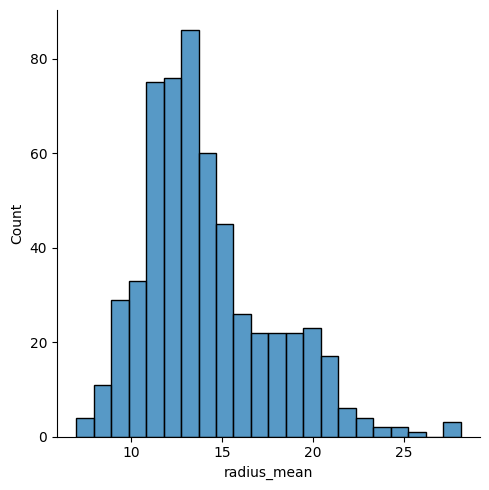

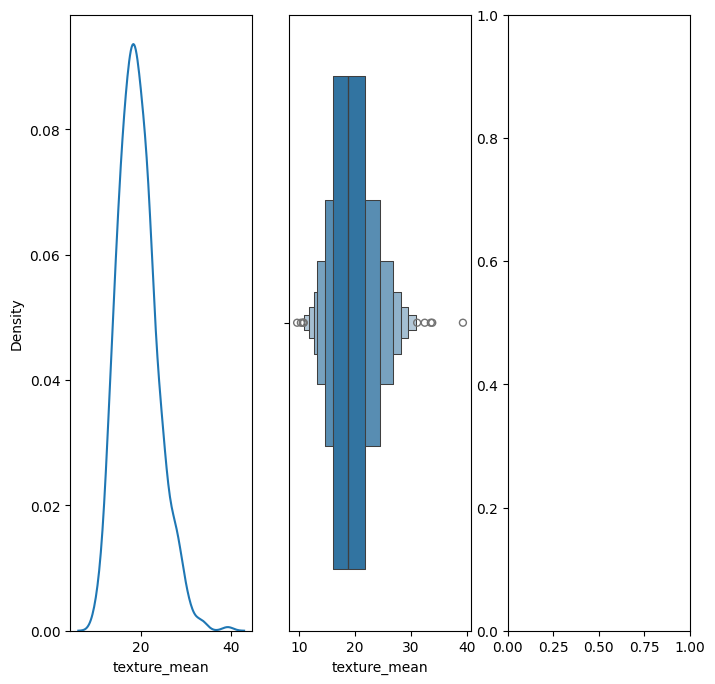

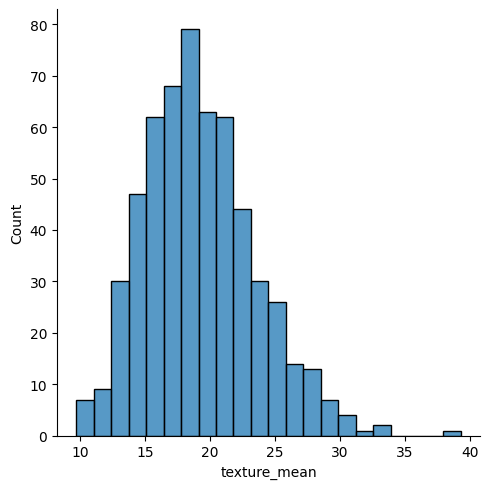

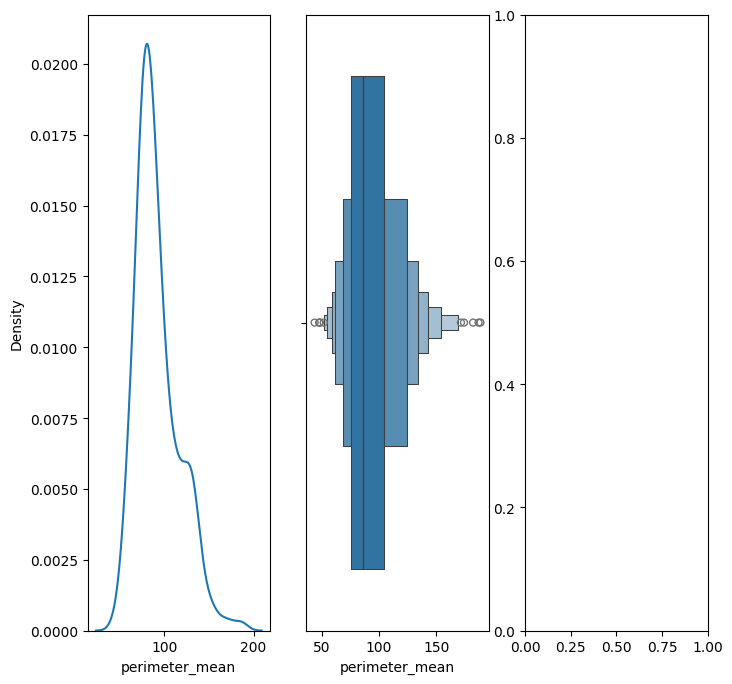

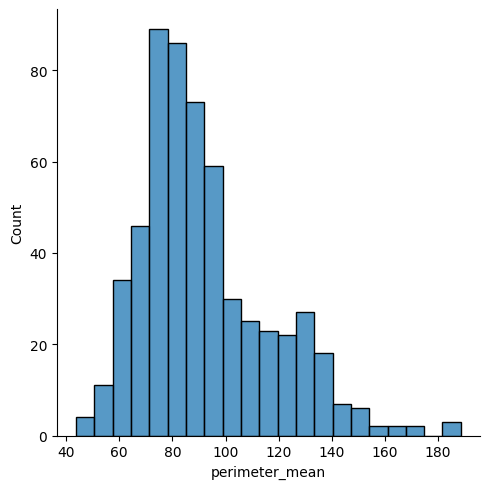

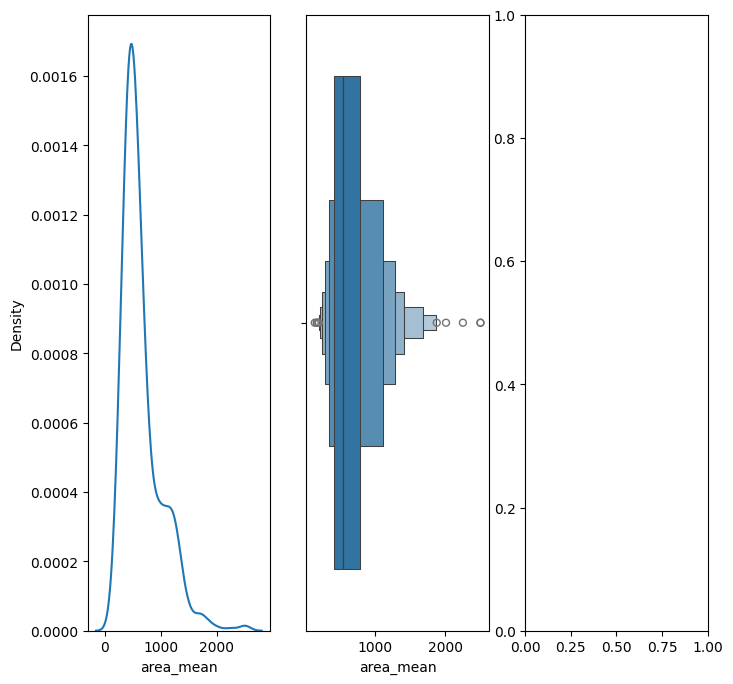

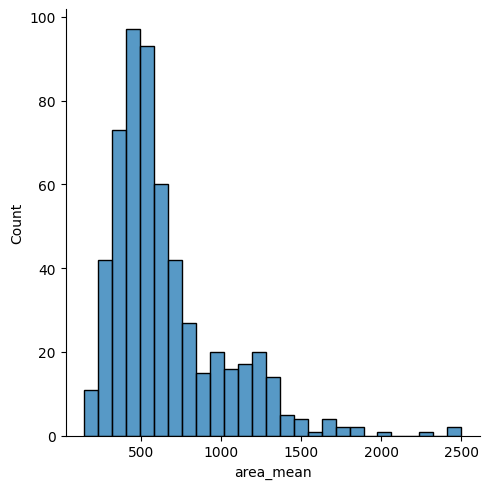

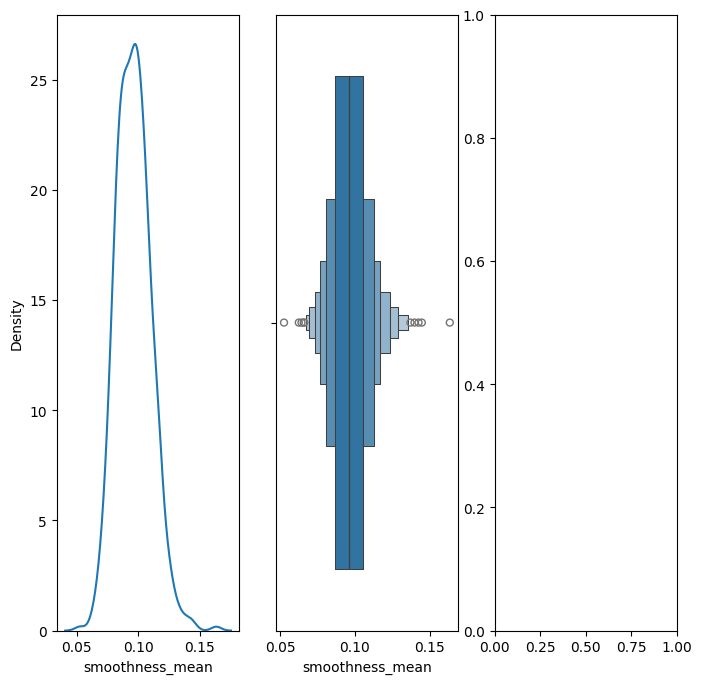

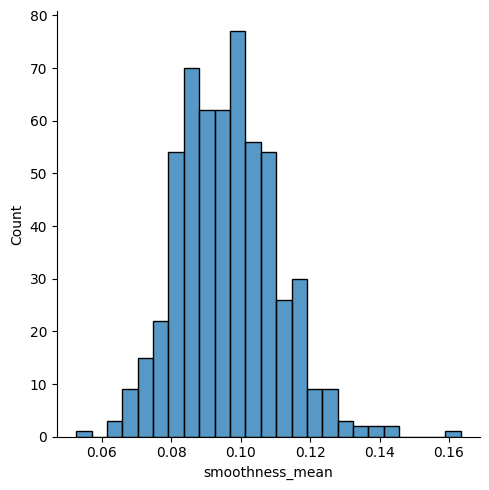

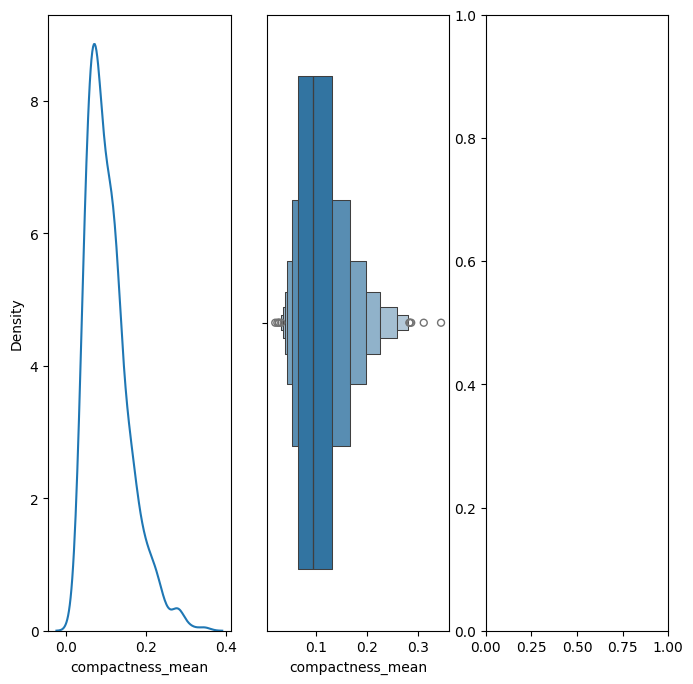

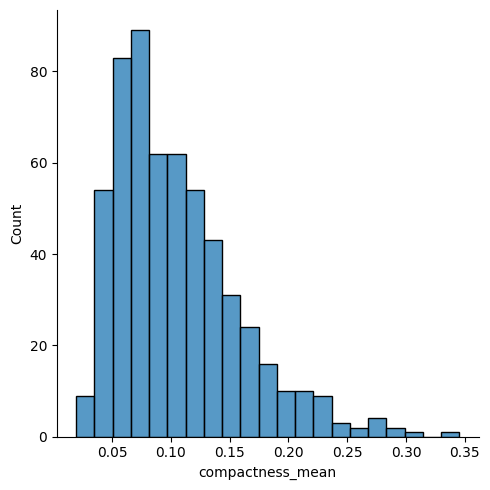

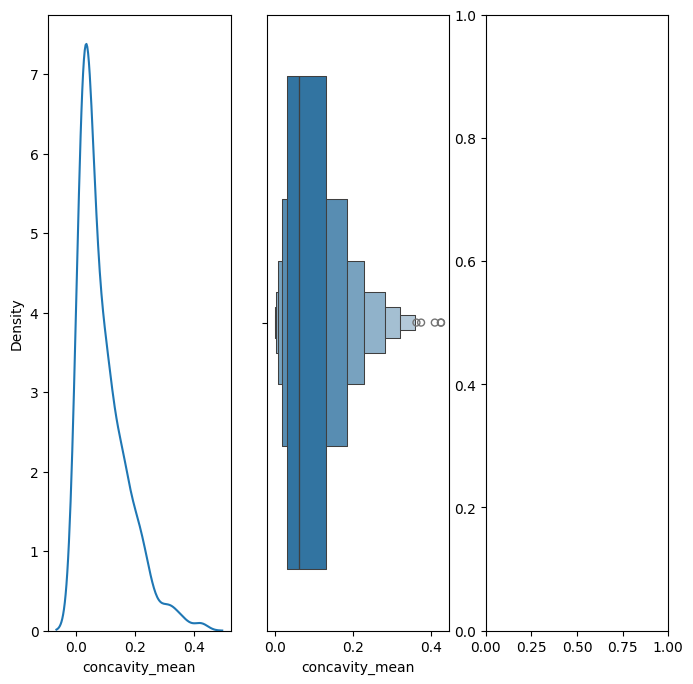

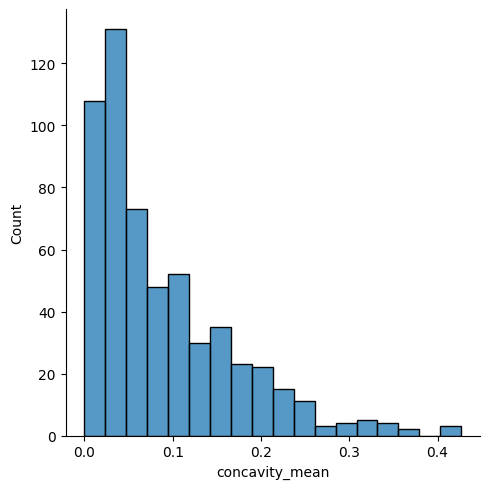

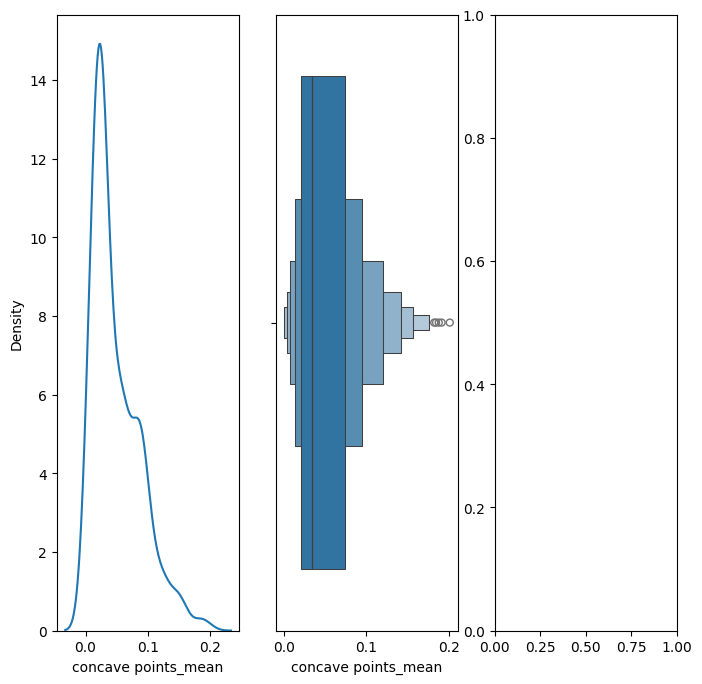

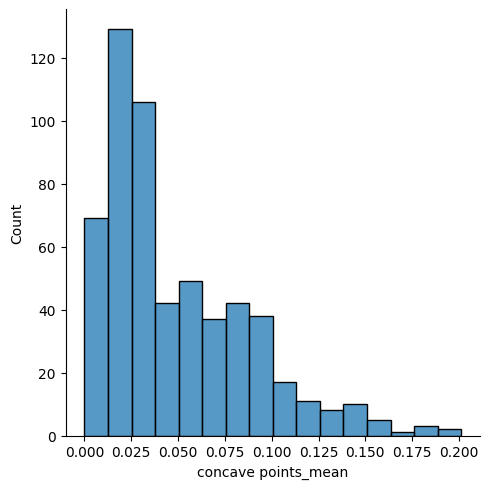

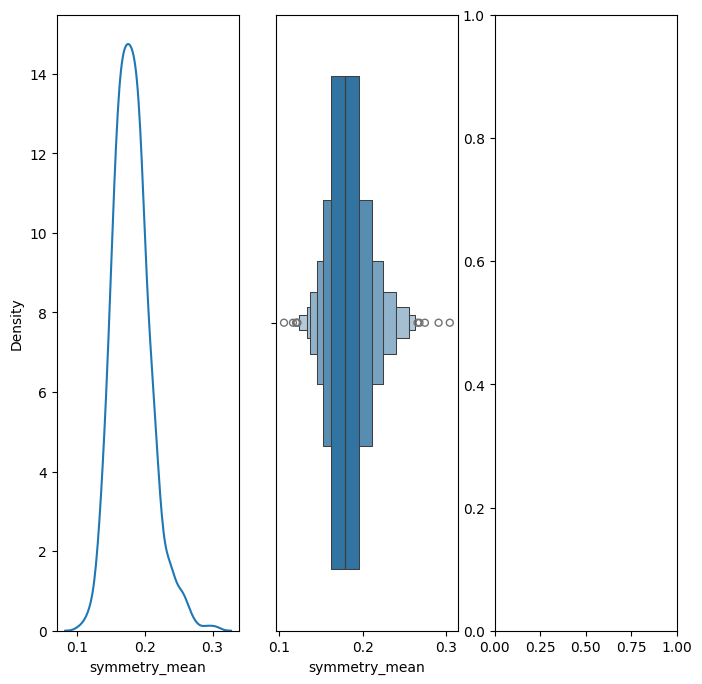

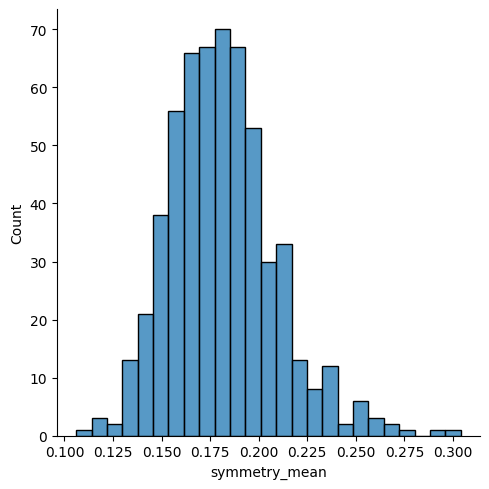

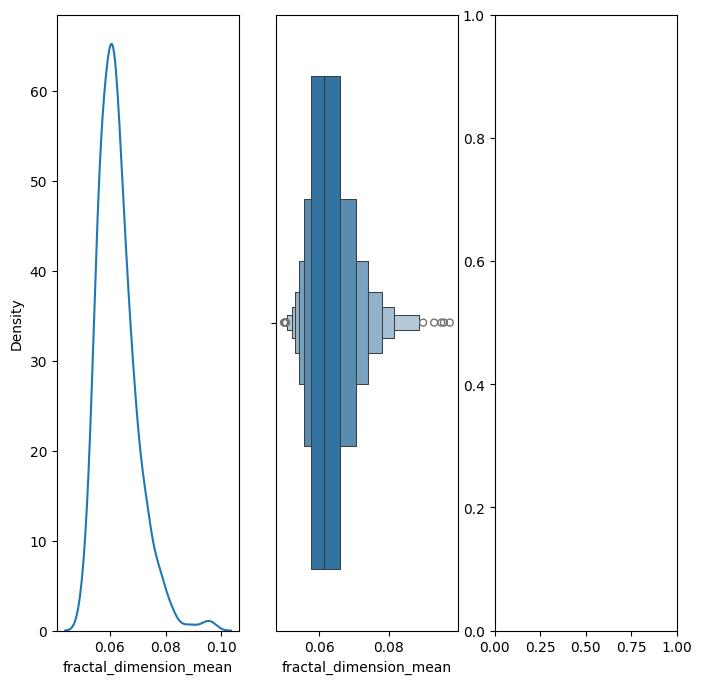

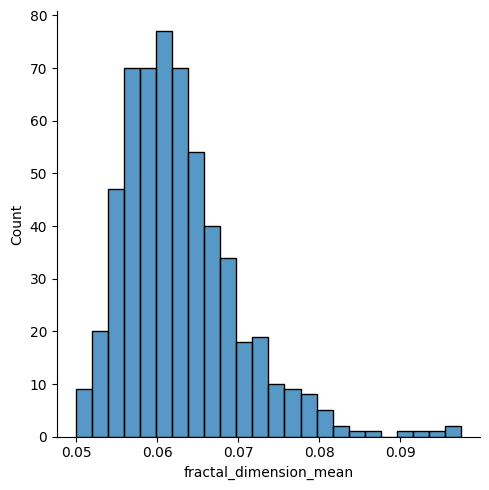

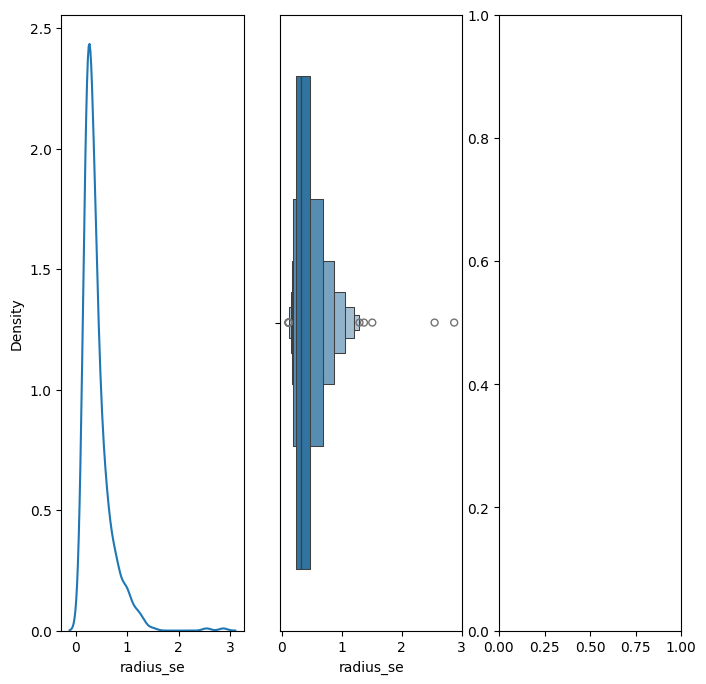

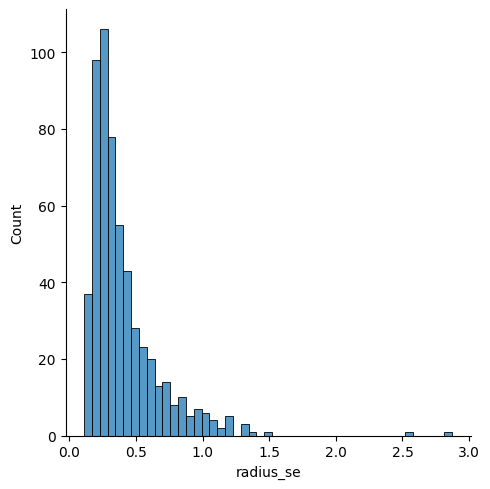

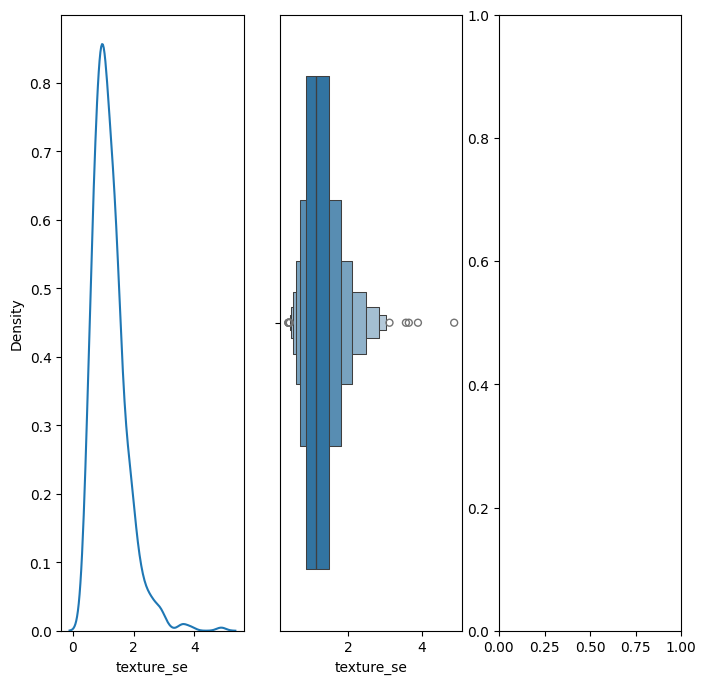

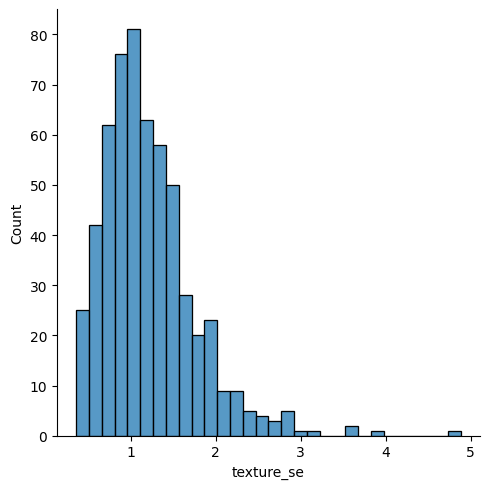

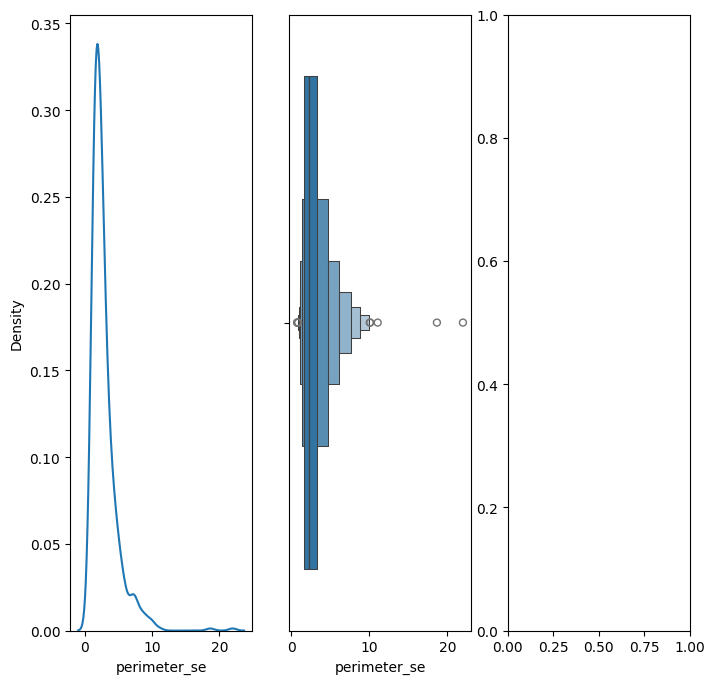

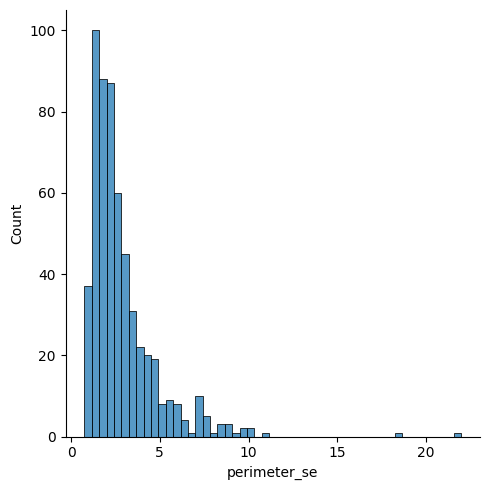

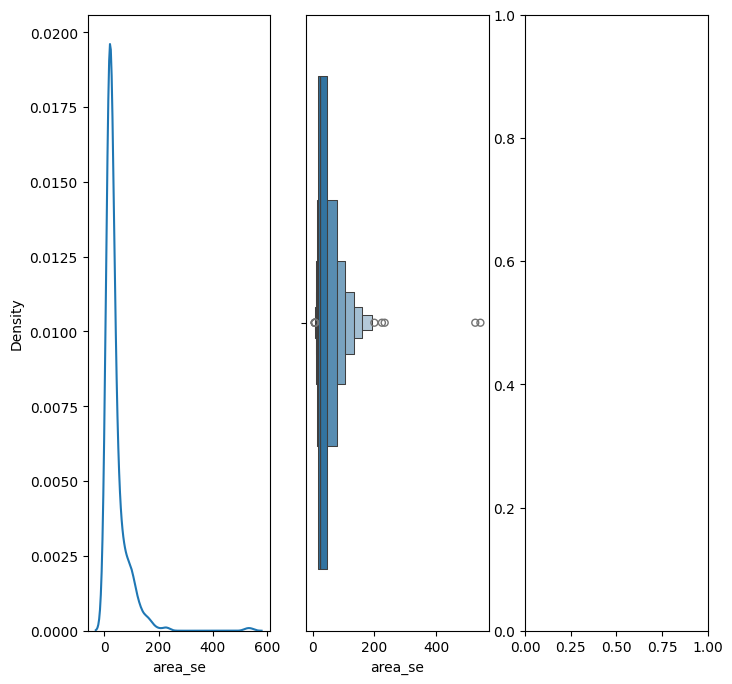

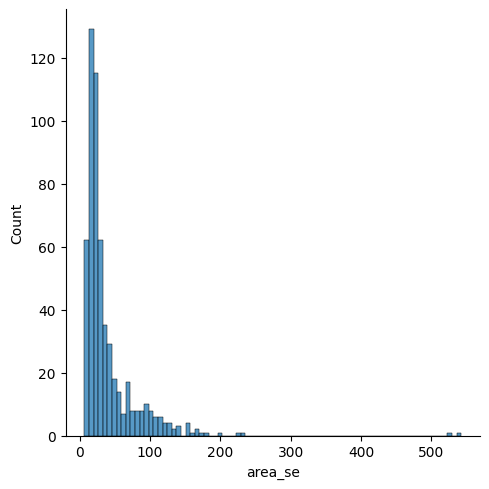

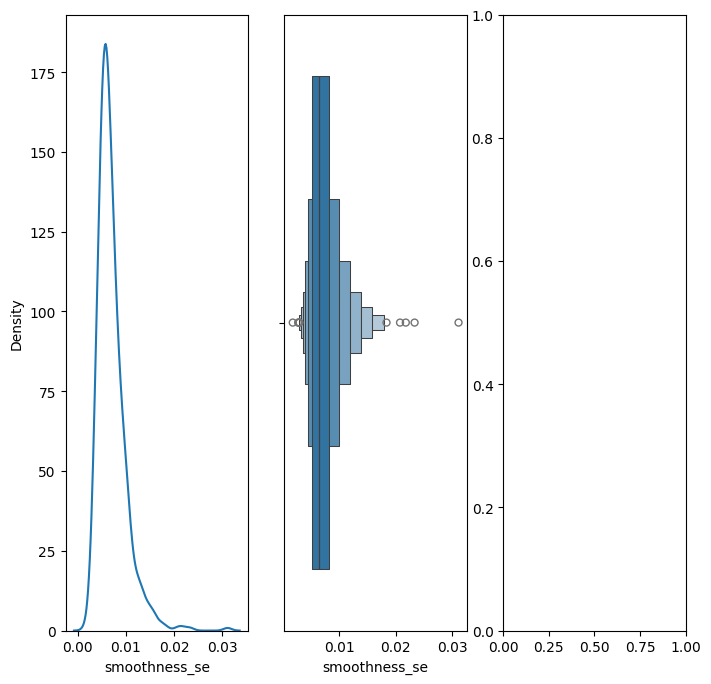

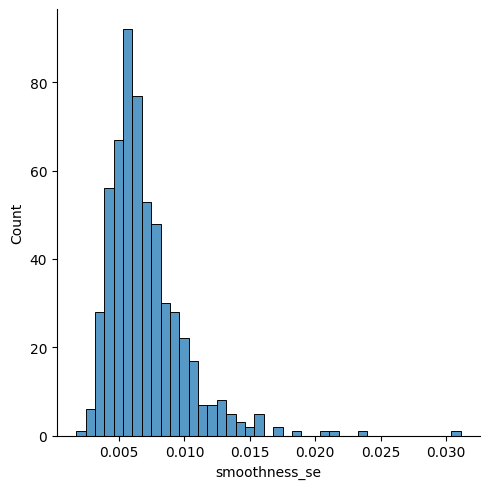

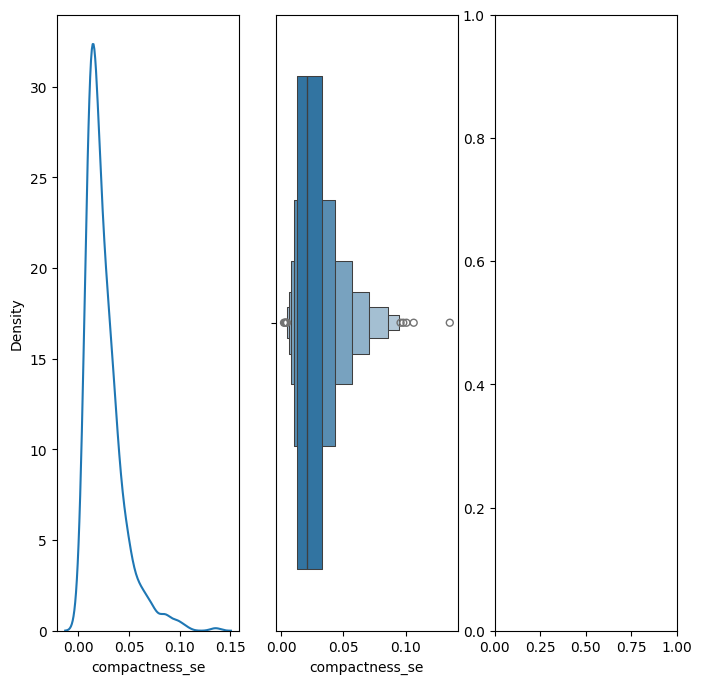

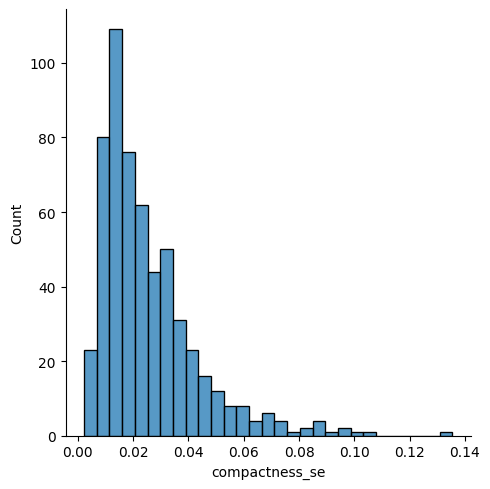

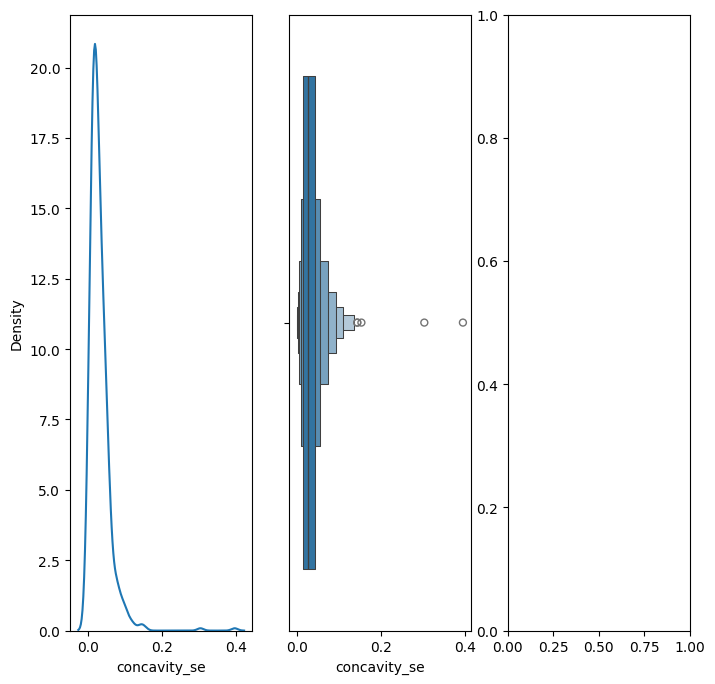

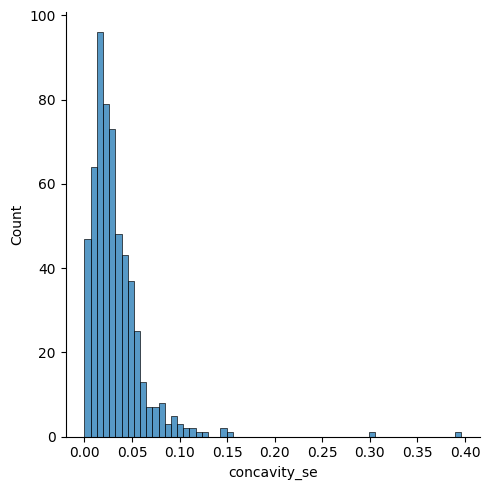

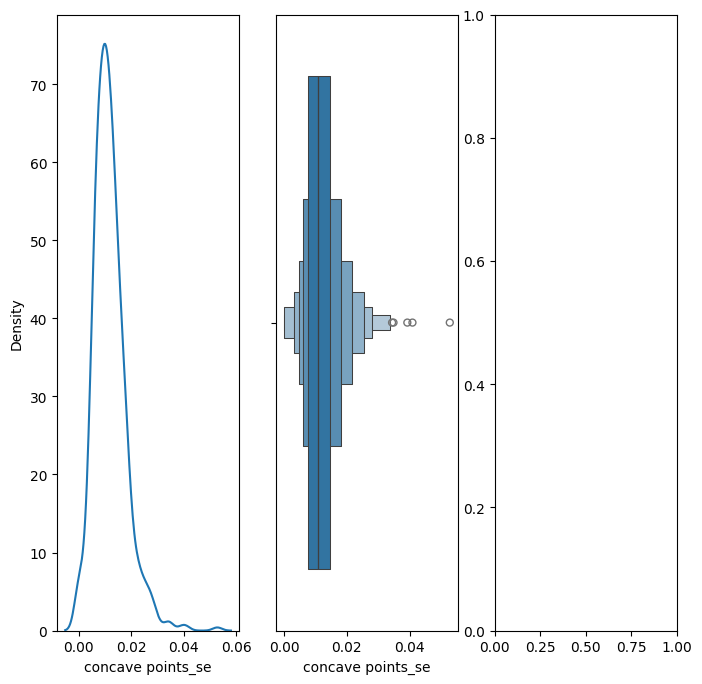

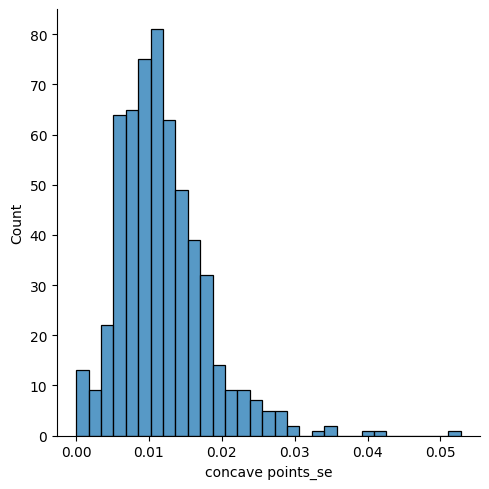

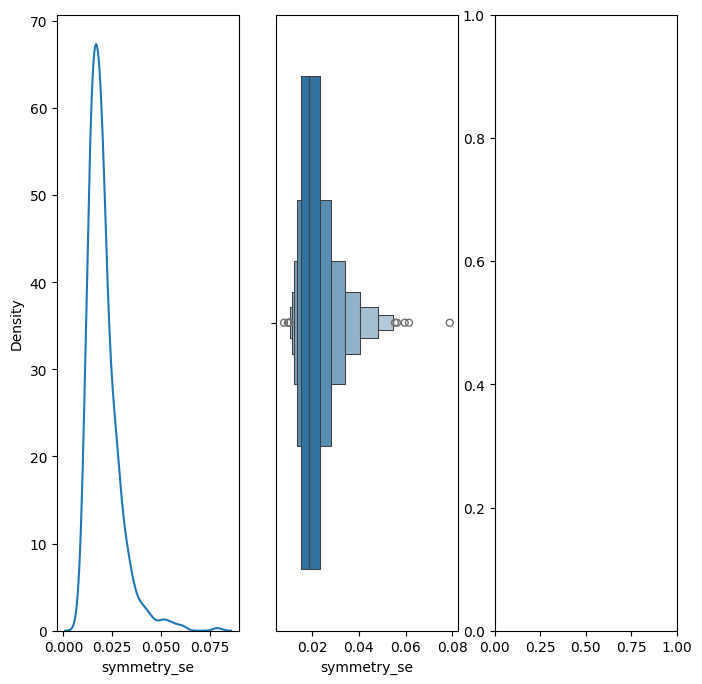

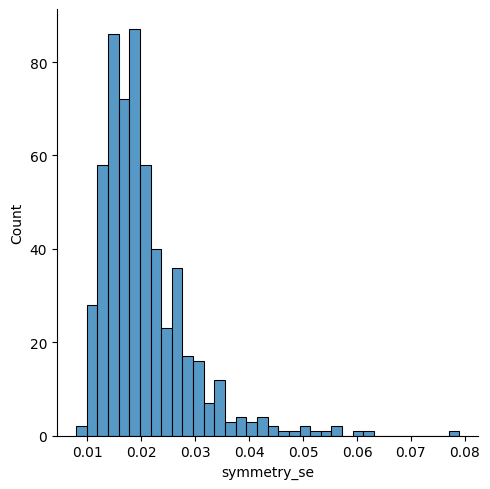

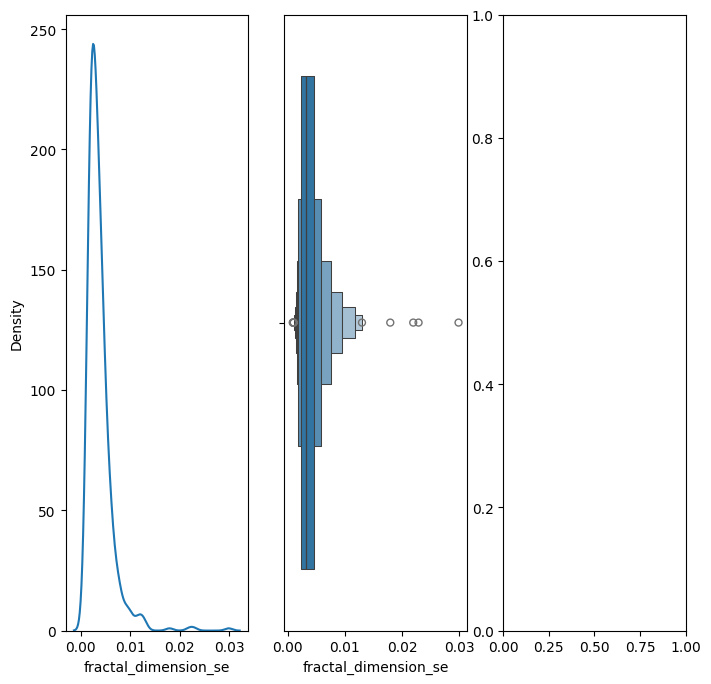

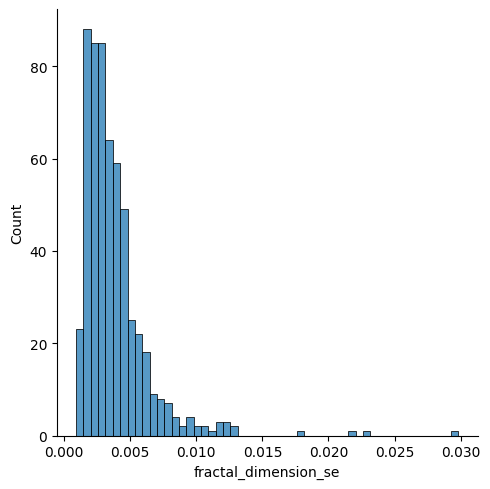

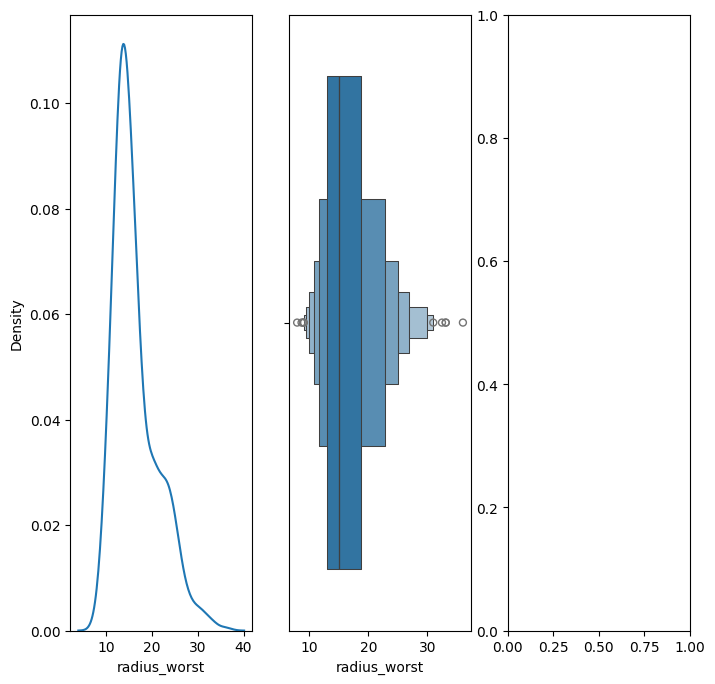

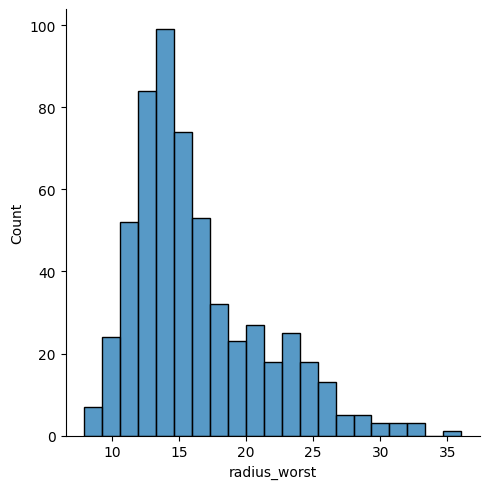

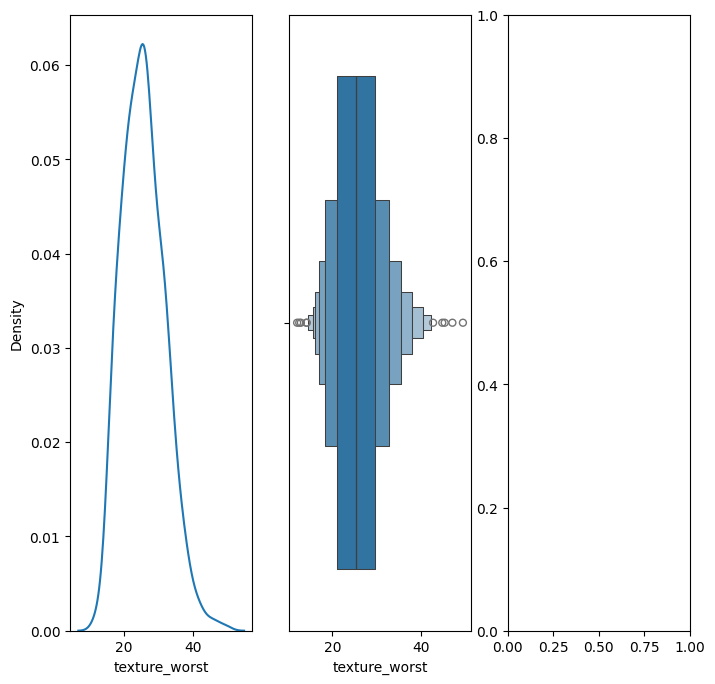

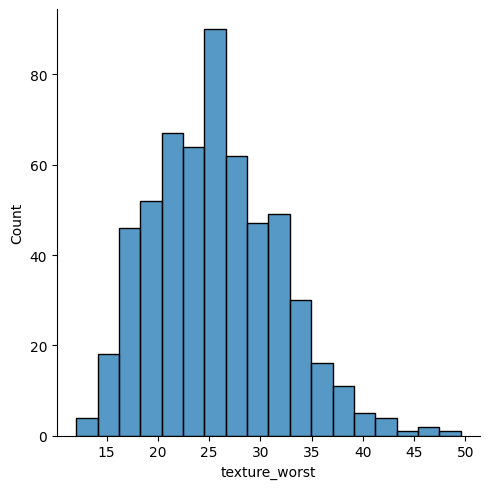

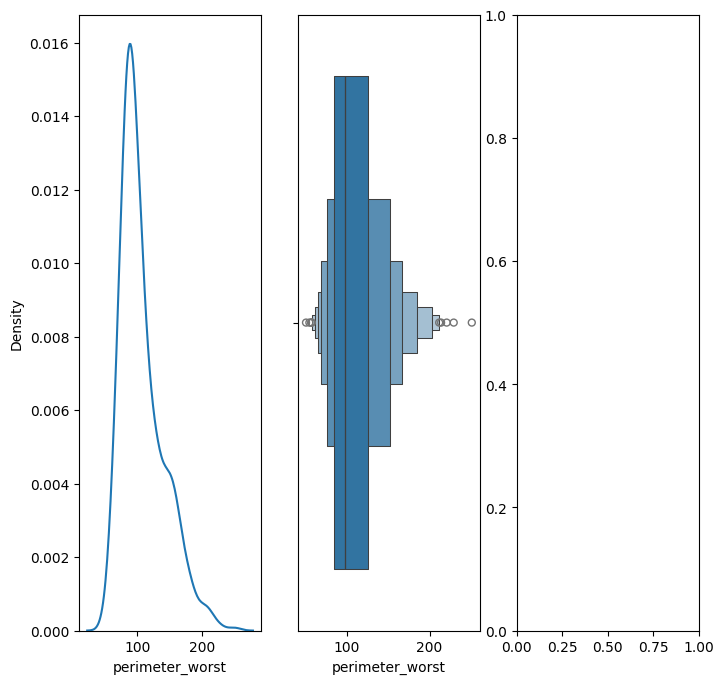

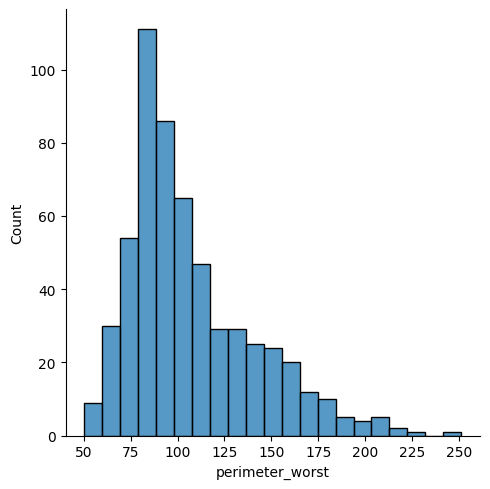

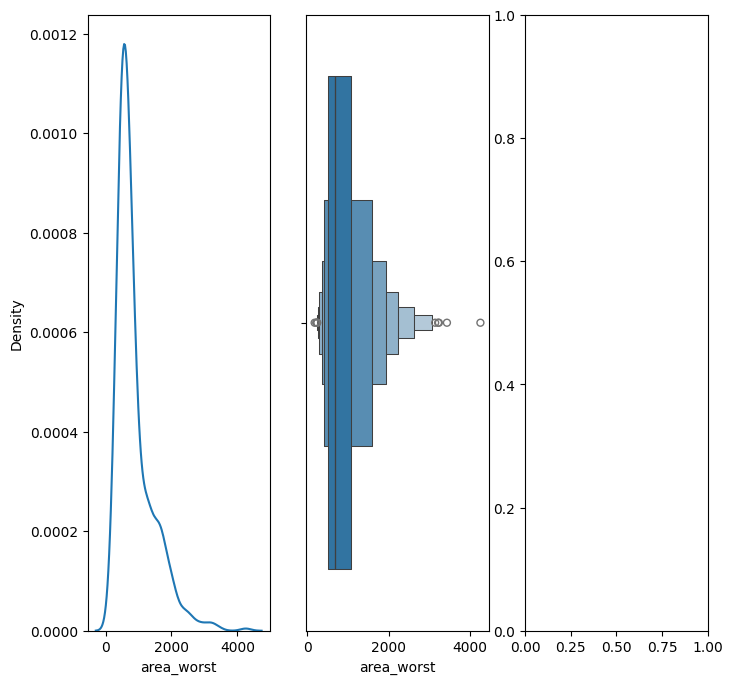

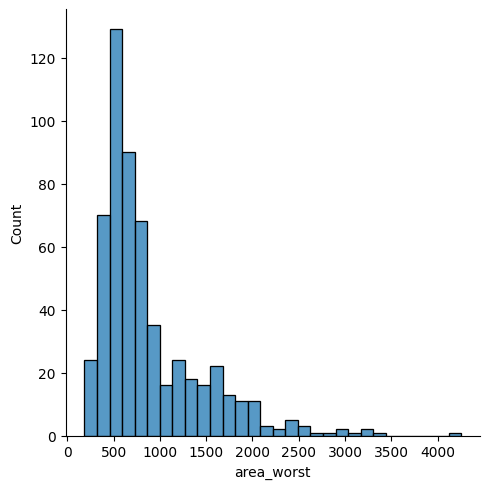

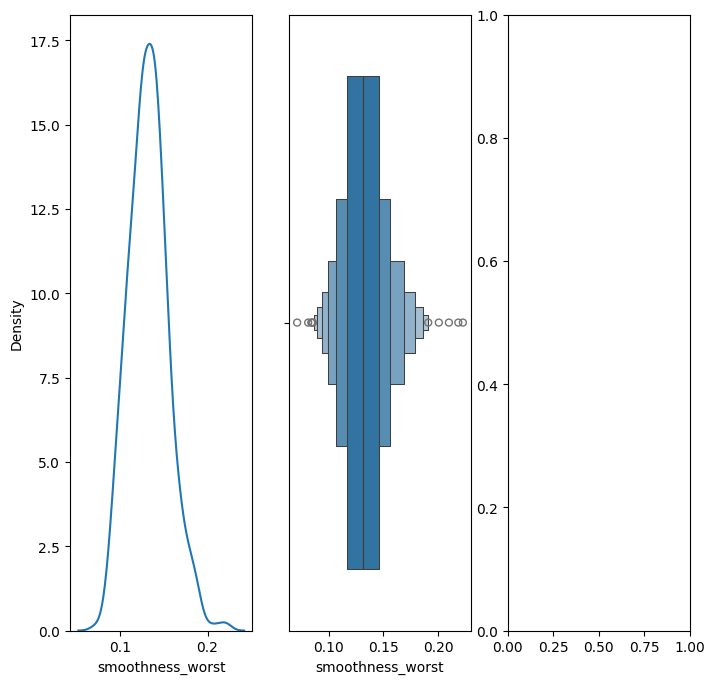

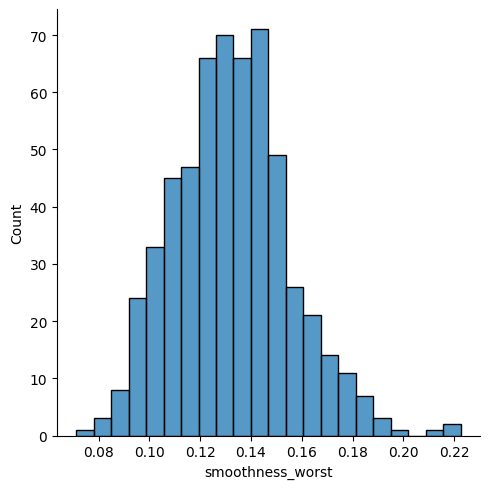

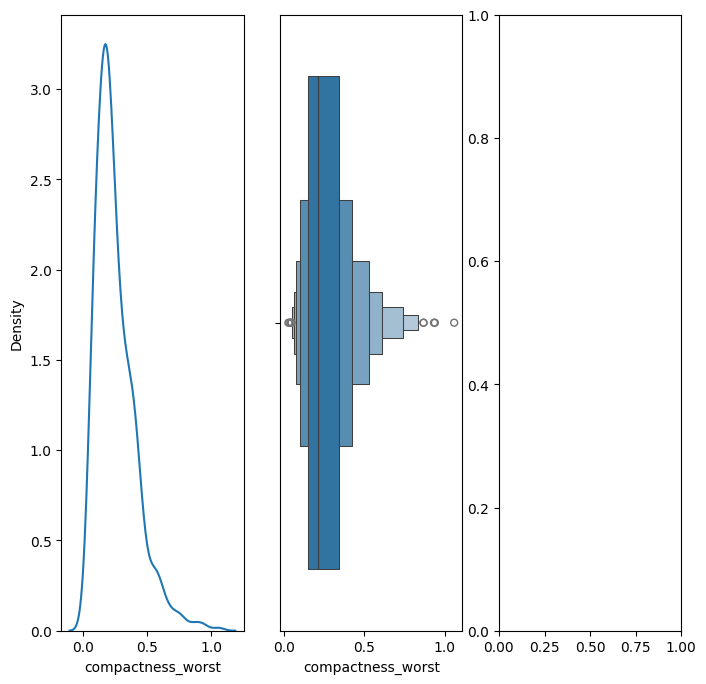

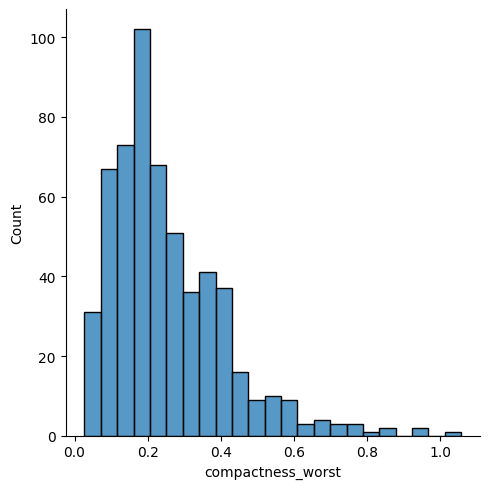

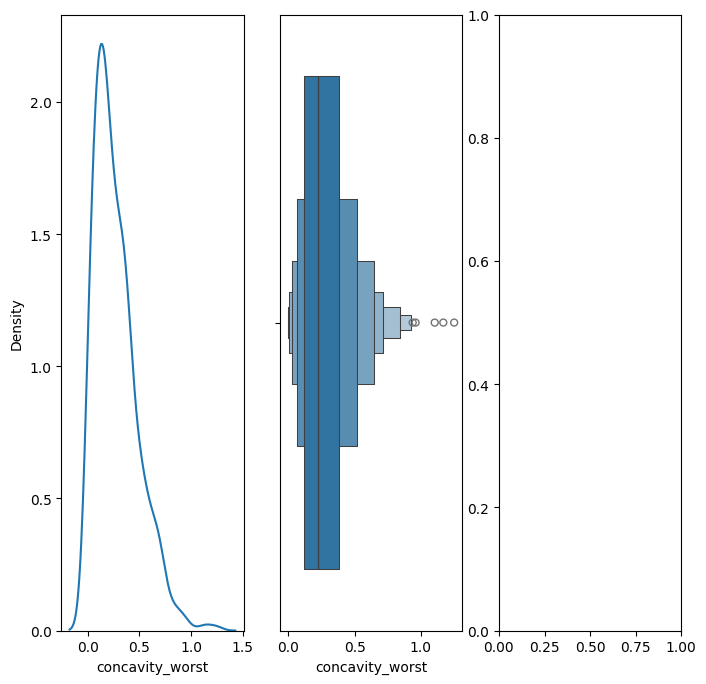

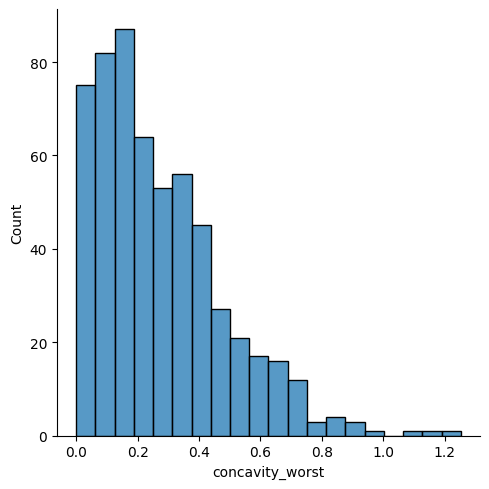

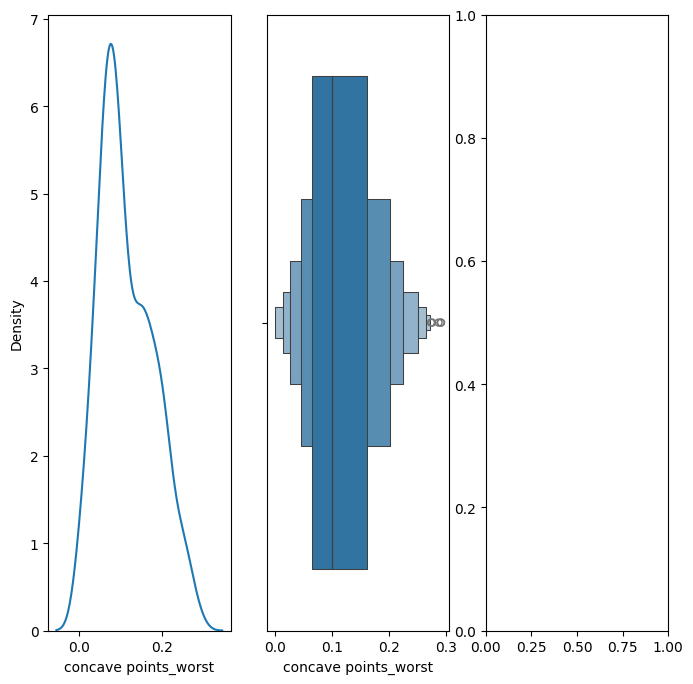

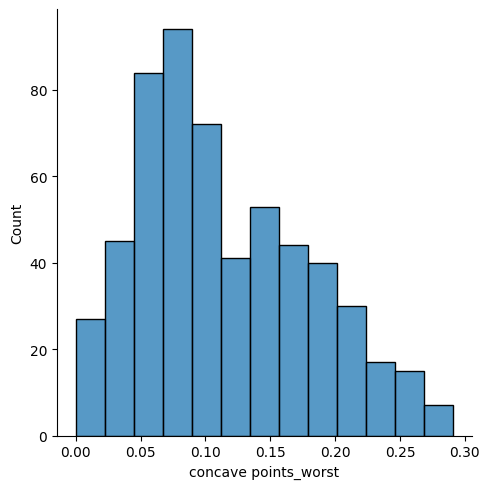

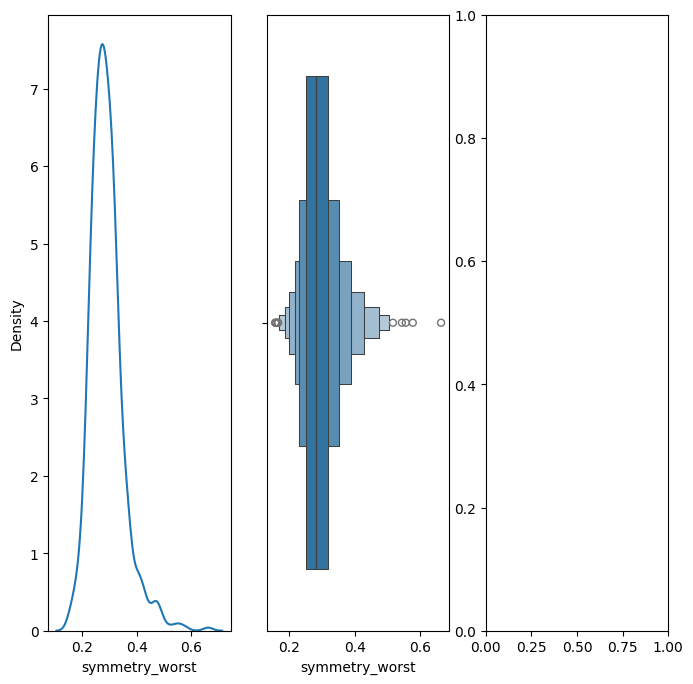

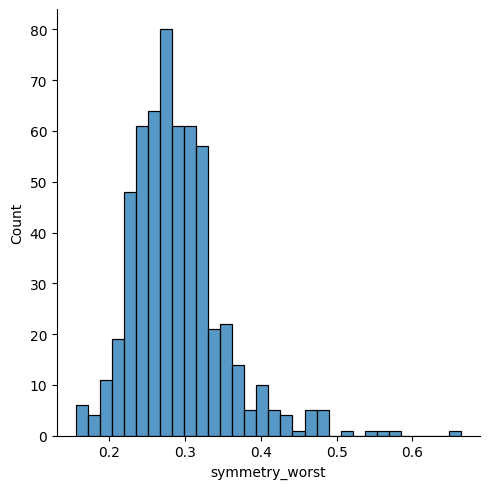

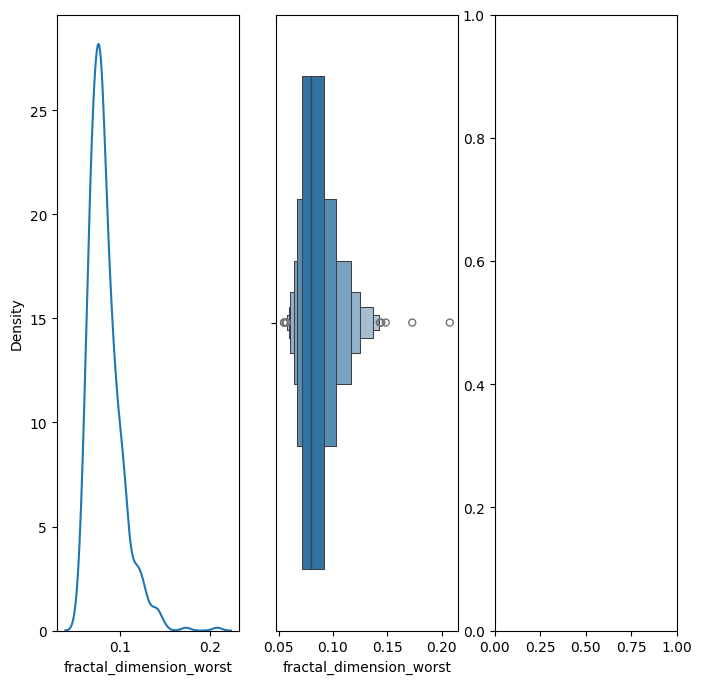

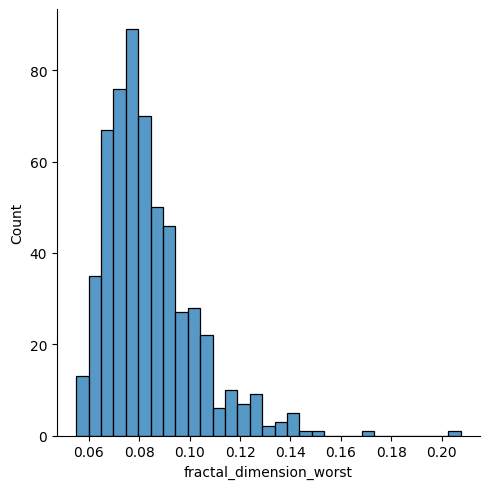

In [34]:
for i in df.columns:
    plt.figure(figsize=(8,8))
    plt.subplot(1,3,1)
    sns.kdeplot(data=df,x=i)
    plt.subplot(1,3,2)
    sns.boxenplot(data=df,x=i)
    plt.subplot(1,3,3)
    sns.displot(data=df,x=i)
    plt.show()

In [27]:
x=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [83]:
from sklearn.feature_selection import chi2,SelectKBest
select=SelectKBest(chi2,k=10)
select.fit(x_train,y_train)
x_train.columns[select.get_support()]

C:\Users\GUNATEJA\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=5. All the features will be returned.
  warnings.warn(


Index(['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst'],
      dtype='object')

In [41]:
new_df=df[['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst','diagnosis']]

In [42]:
new_df.head()

,perimeter_mean,area_mean,area_se,perimeter_worst,area_worst,diagnosis
0,122.80,1001.0,153.40,184.60,2019.0,1
1,132.90,1326.0,74.08,158.80,1956.0,1
2,130.00,1203.0,94.03,152.50,1709.0,1
3,77.58,386.1,27.23,98.87,567.7,1
4,135.10,1297.0,94.44,152.20,1575.0,1


In [45]:
for k,v in new_df.items():  #k=keys(columns names) ,v=values(columns values)
  q1=v.quantile(0.25)
  q3=v.quantile(0.75)
  iqr=q3-q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(new_df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column perimeter_mean outliers = 2.28%
Column area_mean outliers = 4.39%
Column area_se outliers = 11.42%
Column perimeter_worst outliers = 2.64%
Column area_worst outliers = 6.15%
Column diagnosis outliers = 0.00%


<Axes: >

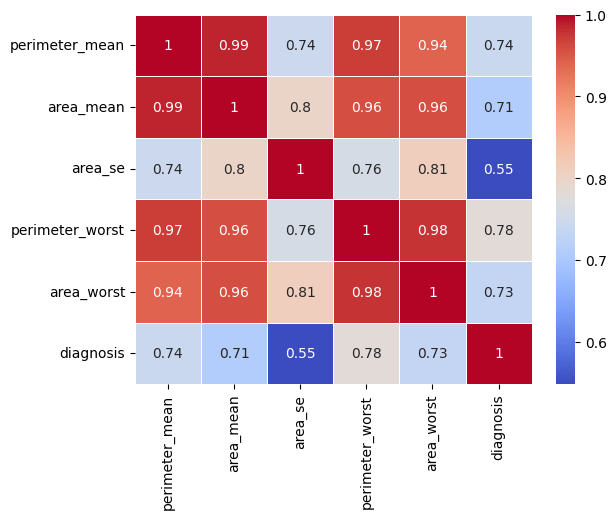

In [46]:
corre=new_df.corr()
sns.heatmap(corre,annot=True, cmap='coolwarm', linewidths=0.5)

In [47]:
new_df.columns

Index(['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst', 'diagnosis'],
      dtype='object')

In [49]:
new_df.rename({'perimeter_mean': 'average_cell_perimeter',
    'area_mean': 'average_cell_area',
    'area_se': 'cell_area_standard_error',
    'perimeter_worst': 'largest_cell_perimeter',
    'area_worst': 'largest_cell_area',
    'diagnosis': 'cancer_diagnosis_result'})

,perimeter_mean,area_mean,area_se,perimeter_worst,area_worst,diagnosis
0,122.80,1001.0,153.40,184.60,2019.0,1
1,132.90,1326.0,74.08,158.80,1956.0,1
2,130.00,1203.0,94.03,152.50,1709.0,1
3,77.58,386.1,27.23,98.87,567.7,1
4,135.10,1297.0,94.44,152.20,1575.0,1
...,...,...,...,...,...,...
564,142.00,1479.0,158.70,166.10,2027.0,1
565,131.20,1261.0,99.04,155.00,1731.0,1
566,108.30,858.1,48.55,126.70,1124.0,1
567,140.10,1265.0,86.22,184.60,1821.0,1


In [50]:
new_df.head()

,perimeter_mean,area_mean,area_se,perimeter_worst,area_worst,diagnosis
0,122.80,1001.0,153.40,184.60,2019.0,1
1,132.90,1326.0,74.08,158.80,1956.0,1
2,130.00,1203.0,94.03,152.50,1709.0,1
3,77.58,386.1,27.23,98.87,567.7,1
4,135.10,1297.0,94.44,152.20,1575.0,1


In [51]:
new_df.shape

(569, 6)

In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   perimeter_mean   569 non-null    float64
 1   area_mean        569 non-null    float64
 2   area_se          569 non-null    float64
 3   perimeter_worst  569 non-null    float64
 4   area_worst       569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


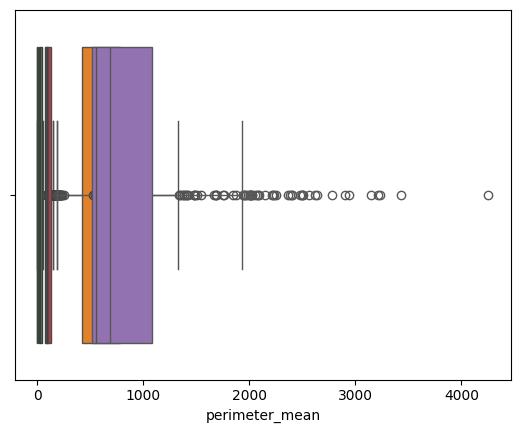

In [55]:
for i in new_df.columns:
    sns.boxplot(data=new_df,x=i)

In [70]:
x_new=new_df.drop("diagnosis", axis=1)
y_new=new_df["diagnosis"]

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,train_size=0.3,random_state=22)

In [72]:
from sklearn.metrics import accuracy_score
def selection(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("Accuracy score is:",accuracy_score(y_test,y_pred)*100)

In [73]:
from sklearn.linear_model import LogisticRegression
selection(LogisticRegression())

Accuracy score is: 93.23308270676691


In [74]:
from sklearn.tree import DecisionTreeClassifier
selection(DecisionTreeClassifier())


Accuracy score is: 93.48370927318295


In [75]:
from sklearn.ensemble import RandomForestClassifier
selection(RandomForestClassifier())

Accuracy score is: 91.72932330827066


In [76]:
from xgboost import XGBClassifier
selection(XGBClassifier())

Accuracy score is: 92.4812030075188


In [77]:
from sklearn.ensemble import AdaBoostClassifier
selection(AdaBoostClassifier())

Accuracy score is: 92.73182957393483


C:\Users\GUNATEJA\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [67]:
from catboost import CatBoostClassifier
selection(CatBoostClassifier())

Learning rate set to 0.004834
0:	learn: 0.6868195	total: 95.6ms	remaining: 1m 35s
1:	learn: 0.6793327	total: 98.8ms	remaining: 49.3s
2:	learn: 0.6733177	total: 101ms	remaining: 33.7s
3:	learn: 0.6680605	total: 104ms	remaining: 26s
4:	learn: 0.6601752	total: 107ms	remaining: 21.3s
5:	learn: 0.6540912	total: 109ms	remaining: 18.1s
6:	learn: 0.6458819	total: 112ms	remaining: 15.9s
7:	learn: 0.6393922	total: 114ms	remaining: 14.1s
8:	learn: 0.6315428	total: 116ms	remaining: 12.8s
9:	learn: 0.6244392	total: 118ms	remaining: 11.7s
10:	learn: 0.6189800	total: 121ms	remaining: 10.9s
11:	learn: 0.6126787	total: 124ms	remaining: 10.2s
12:	learn: 0.6069146	total: 126ms	remaining: 9.57s
13:	learn: 0.6020574	total: 129ms	remaining: 9.08s
14:	learn: 0.5964907	total: 132ms	remaining: 8.65s
15:	learn: 0.5900601	total: 135ms	remaining: 8.31s
16:	learn: 0.5838755	total: 138ms	remaining: 7.97s
17:	learn: 0.5798837	total: 141ms	remaining: 7.69s
18:	learn: 0.5735793	total: 144ms	remaining: 7.42s
19:	learn:

In [78]:
from sklearn.neighbors import KNeighborsClassifier
selection(KNeighborsClassifier())

Accuracy score is: 91.97994987468672


catboost has best accuracy

In [85]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
cat.fit(x_train,y_train)
y_pred=cat.predict(x_test)

Learning rate set to 0.004834
0:	learn: 0.6854663	total: 4.21ms	remaining: 4.21s
1:	learn: 0.6782126	total: 6.21ms	remaining: 3.1s
2:	learn: 0.6713439	total: 7.99ms	remaining: 2.66s
3:	learn: 0.6640121	total: 9.63ms	remaining: 2.4s
4:	learn: 0.6573023	total: 11.1ms	remaining: 2.21s
5:	learn: 0.6497027	total: 12.8ms	remaining: 2.13s
6:	learn: 0.6436218	total: 14.4ms	remaining: 2.04s
7:	learn: 0.6375223	total: 16.5ms	remaining: 2.04s
8:	learn: 0.6316038	total: 18.3ms	remaining: 2.01s
9:	learn: 0.6242761	total: 19.7ms	remaining: 1.95s
10:	learn: 0.6184919	total: 21.2ms	remaining: 1.91s
11:	learn: 0.6119397	total: 22.7ms	remaining: 1.87s
12:	learn: 0.6063924	total: 24.1ms	remaining: 1.83s
13:	learn: 0.6009574	total: 25.7ms	remaining: 1.81s
14:	learn: 0.5950353	total: 27.4ms	remaining: 1.8s
15:	learn: 0.5898538	total: 29ms	remaining: 1.78s
16:	learn: 0.5839333	total: 30.4ms	remaining: 1.76s
17:	learn: 0.5789088	total: 31.9ms	remaining: 1.74s
18:	learn: 0.5736308	total: 33.5ms	remaining: 1.7

In [86]:
import pickle

In [87]:
pickle.dump(cat,open('model.pkl','wb')) 

In [88]:
new_df.head()

,perimeter_mean,area_mean,area_se,perimeter_worst,area_worst,diagnosis
0,122.80,1001.0,153.40,184.60,2019.0,1
1,132.90,1326.0,74.08,158.80,1956.0,1
2,130.00,1203.0,94.03,152.50,1709.0,1
3,77.58,386.1,27.23,98.87,567.7,1
4,135.10,1297.0,94.44,152.20,1575.0,1


MODEL IS DONE -__-